<a href="https://colab.research.google.com/github/TimSim/FraudDetection/blob/main/CreditCardFraudDetectionTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to identify fraudulent credit card transactions using ML or Deep Learning models. Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification. We recommend using the TensorFlow tf.keras.metrics.AUC(curve='PR') as our performance and scoring metric.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib
#import seaborn as sns
from matplotlib import pylab as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['agg.path.chunksize'] = 10000

pd.set_option('display.max_columns', None)

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls -la "/content/drive/My Drive/Colab Notebooks/data"

total 157245
-rw------- 1 root root 150828752 Sep 19  2019 creditcard.csv
-rw------- 1 root root  10188854 May  6  2019 Shakespeare_data.csv


Credit Card data from https://www.kaggle.com/mlg-ulb/creditcardfraud


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/creditcard.csv')
(tv_df,test_df) = train_test_split(df, stratify=df['Class'], test_size=0.2, random_state=51)

In [5]:
# split the training data into training and validation:
train_df, val_df = train_test_split(tv_df, stratify=tv_df['Class'], test_size=0.2, random_state=51)

In [6]:
# Verify stratification:
print((test_df.shape,df.shape,len(test_df)/len(df)))
print((test_df.Class.sum(),df.Class.sum(),test_df.Class.sum()/df.Class.sum()))

((56962, 31), (284807, 31), 0.20000210668979343)
(98, 492, 0.1991869918699187)


In [7]:

# separate class from features:
(X_train,X_val,X_test,X_tv) = [DF.drop('Class',axis=1,inplace=False) for DF in [train_df,val_df,test_df,tv_df]]
(y_train,y_val,y_test,y_tv) = [DF['Class'] for DF in [train_df,val_df,test_df,tv_df]]

In [8]:
tv_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94834.244666,-0.000429,-0.001766,-0.001021,0.000414,-0.000731,0.001989,0.001310,-0.001327,-0.000376,0.001597,0.000143,0.000581,0.000103,-0.001121,-0.000030,-0.000144,-0.000657,-0.000136,0.000653,0.000517,0.000100,0.000326,0.000070,0.001336,0.000473,-0.000161,0.000165,-0.000059,88.771219,0.001729
std,47476.822552,1.967426,1.662720,1.521840,1.416733,1.385033,1.334890,1.247306,1.195472,1.099686,1.090792,1.019617,0.996069,0.994237,0.958634,0.915960,0.876402,0.848492,0.838721,0.814122,0.778989,0.740174,0.726675,0.625204,0.605842,0.521631,0.481928,0.404762,0.331608,253.068313,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-50.688419,-13.434066,-24.588262,-4.797473,-18.683715,-4.008640,-19.214325,-4.498945,-14.129855,-24.019099,-9.335193,-7.213527,-54.497720,-22.889347,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54246.000000,-0.919893,-0.599011,-0.890786,-0.847792,-0.691670,-0.766960,-0.553506,-0.208716,-0.644858,-0.533726,-0.761618,-0.405820,-0.647725,-0.427788,-0.582582,-0.467742,-0.484224,-0.499053,-0.454887,-0.211660,-0.228192,-0.542369,-0.161836,-0.354038,-0.316550,-0.327156,-0.070900,-0.052907,5.700000,0.000000
50%,84691.000000,0.018846,0.063994,0.180546,-0.019239,-0.055925,-0.272083,0.041010,0.021875,-0.050596,-0.092371,-0.032355,0.139424,-0.013170,0.049538,0.047587,0.066979,-0.065487,-0.003826,0.004441,-0.062241,-0.029092,0.006740,-0.011021,0.042253,0.017417,-0.051862,0.001194,0.011292,22.060000,0.000000
75%,139340.000000,1.315404,0.802516,1.027751,0.743302,0.612093,0.399907,0.570426,0.325719,0.597298,0.454159,0.739493,0.618366,0.661789,0.492063,0.649629,0.521739,0.400064,0.501636,0.458616,0.134009,0.186476,0.529748,0.147667,0.441007,0.350871,0.240447,0.090606,0.078413,77.750000,0.000000
max,172788.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,4.846452,7.126883,7.754599,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,8.361985,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000



This dataset is 227845 datapoints after we removed 20% for testing.<br>
Features are labeled V and a number and are black box features (we don't know economic or other meaning of them). They are a result of a Principal Component Reduction. (features V1 thru V28 are the result of a PCA, run over all 284807 samples of original dataset).<br>
Time is time elapsed in seconds since the beggining of the dataset. 
Amount amount of transaction. 
The V_n resemble PCA output.

Stds are decreasing steadily with each V_n

Means are very close to zero, but not exactly zero. They should be exactly zero for PCA. Perhaps they were exactly zero before we carved out a test set? 

Most PCs do include some extreme outliers.

In [9]:
tv_df[tv_df.Class==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0
mean,81398.664975,-4.844204,3.702045,-7.103359,4.513672,-3.215601,-1.377679,-5.697448,0.294716,-2.582508,-5.728446,3.757555,-6.193830,-0.145069,-6.954490,-0.059050,-4.140517,-6.611233,-2.238158,0.663064,0.405860,0.743573,-0.001732,-0.011422,-0.091423,0.044757,0.040487,0.148092,0.082279,123.427056,1.0
std,48070.059166,6.905678,4.401831,7.129159,2.825324,5.377178,1.910775,7.454604,7.314756,2.567686,4.926100,2.626405,4.520800,1.128695,4.162451,1.067186,3.822012,6.935905,2.888515,1.565038,1.435602,4.276761,1.615337,1.511172,0.513911,0.788806,0.473072,1.428180,0.538650,265.931222,0.0
min,406.000000,-30.552380,-7.449015,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-24.019099,-9.335193,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.552593,0.000000,1.0
25%,41234.000000,-6.185857,1.218545,-8.586704,2.400206,-4.801176,-2.484426,-7.903402,-0.230744,-3.877669,-7.520666,2.061138,-8.654537,-1.016123,-9.398537,-0.598972,-6.551650,-12.072373,-4.629082,-0.383447,-0.171591,0.098377,-0.541855,-0.344701,-0.415312,-0.312004,-0.263161,-0.017603,-0.104948,1.000000,1.0
50%,74921.500000,-2.352844,2.720177,-5.075257,4.187495,-1.621234,-1.431912,-3.044264,0.568659,-2.133707,-4.556094,3.586609,-5.434170,-0.117313,-6.789141,-0.034679,-3.626171,-5.287250,-1.695375,0.600661,0.304766,0.602709,0.038201,-0.068174,-0.031239,0.082519,-0.006489,0.404371,0.150454,9.170000,1.0
75%,128576.000000,-0.357602,4.950132,-2.476831,6.245229,0.201776,-0.450849,-0.981932,1.706456,-0.777500,-2.743685,5.205445,-3.013519,0.678863,-4.347369,0.666365,-1.253042,-1.322019,0.058868,1.662803,0.820768,1.319726,0.623456,0.307290,0.283599,0.457364,0.399143,0.828718,0.382448,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,6.198304,6.474115,5.431271,20.007208,3.353525,3.245086,12.018913,1.237773,2.815440,1.571080,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.773326,2125.870000,1.0


Descriptive stats for the fraud points look very different than for the legit transactions. Many of the PCs have fraud means multiple stdevs away from legit means.

Let's see which PC fraud means are the most legit stdevs away from the legit means

In [10]:
tv0 = tv_df[tv_df.Class==0]
tv1 = tv_df[tv_df.Class==1]

Let's do some basic exploration of the data - class distribution

In [11]:
describe_tv0 = tv0.describe()
describe_tv1 = tv1.describe()
relative_zBAR = (describe_tv1.loc['mean'] - describe_tv0.loc['mean']) / describe_tv0.loc['std']
print(relative_zBAR.sort_values())

V17      -8.831453
V14      -7.754993
V12      -6.570144
V10      -5.490377
V16      -4.906965
V3       -4.858184
V7       -4.814204
V18      -2.715582
V1       -2.504193
V9       -2.372691
V5       -2.365321
V6       -1.037235
Time     -0.283508
V24      -0.153340
V13      -0.146305
V15      -0.064568
V23      -0.018492
V22      -0.002847
V26       0.084488
V25       0.085139
Amount    0.137194
V28       0.249094
V8        0.256279
V27       0.369817
V20       0.522450
V19       0.817435
V21       1.036548
V2        2.252911
V4        3.228128
V11       3.754541
Class          inf
dtype: float64



Severy imbalance in the dataset. Out of the 200K points only 400 are fraud. <br>
Strongly separated features include V17, V14, V12, V10 (Class of course gives inf)

The only two interpretable features (Time and Amount) fail to stand out on summary stats alone.


# **Exploration: Univariate**
Let's view each data field as a time series. See if and how class differences present themselves visually.

In [12]:

# Amount column will be easiest to view on a log scale:

def seriesTransform(df0,colName,myFloor=0.001):
    if (colName=='Amount'):
        return(np.log10(df0[colName].apply(lambda x: max(x,myFloor))))
    else:
        return(df0[colName])

In [13]:
#fraud points are red and background black
def plotImbalancedSeries(X,y,field,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    plt.plot(seriesTransform(X[y==0],field),'.',color=options['colors'][0])
    plt.plot(seriesTransform(X[y==1],field),'.',color=options['colors'][1])
    plt.ylabel(field)
    plt.xlabel('index')
    plt.show()

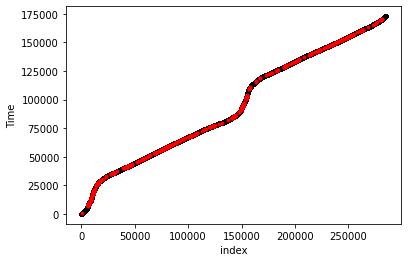

In [14]:
plotImbalancedSeries(X_tv,y_tv,'Time')

Everything is sorted according to time

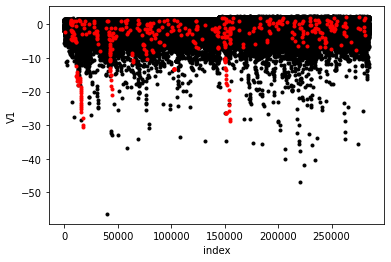

In [15]:
plotImbalancedSeries(X_tv,y_tv,'V1')

The red 3 strings show fraud from one individual or organization mostly in the middle of the night

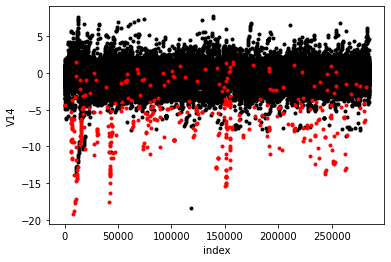

In [16]:
#Selected V14 because Cumulative Distribution Function (see plotImbalancedCDFs) shows good separation for V14 between fraud and background
plotImbalancedSeries(X_tv,y_tv,'V14')

V14 shows fraud better, with the negative values in the red 

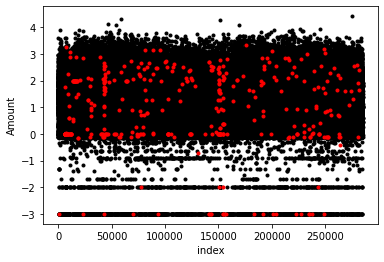

In [17]:
plotImbalancedSeries(X_tv,y_tv,'Amount')
# 0 is $1 and -3 is 0 cents

From Amt it is not clear what fraud is. Maybe the $1 transactions. 
One thing to consider is removing the $1 transactions because when you run PCA test in the credit industry it triggers fraud. Zeros and Ones can be indicative of testing PCA complience by developers. 

# Univariate CDFs
a univariate distribution is a probability distribution of only one random variable

In [18]:
def cdf(ps0):
    ps1 = ps0.sort_values()
    repMin = ps1.iloc[:1]
    ps1 = (pd.concat([repMin,ps1],axis=0)).rename('x')
    cdf_values = pd.Series([(j/len(ps0)) for j in range(len(ps0)+1)],index=ps1.index).rename('CDF')
    return(pd.concat([ps1,cdf_values],axis=1))

In [19]:
QWE = cdf(seriesTransform(tv1,'Amount'))

In [20]:
QWE.head()

,x,CDF
141257,-3.0,0.000000
141257,-3.0,0.002538
237107,-3.0,0.005076
154587,-3.0,0.007614
201098,-3.0,0.010152


In [21]:
def plotImbalancedCDFs(X,y,field,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    cdf_0 = cdf(seriesTransform(X[y==0],field))
    cdf_1 = cdf(seriesTransform(X[y==1],field))
    plt.plot(cdf_0.x,cdf_0.CDF,'.',color=options['colors'][0])
    plt.plot(cdf_1.x,cdf_1.CDF,'.',color=options['colors'][1])
    plt.ylabel('CDF')
    plt.xlabel(field)
    plt.show()

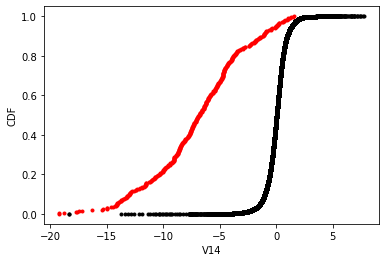

In [22]:
#Cumulative Distribution Function shows good separation for V14 between fraud and background
#Vertical y axes - what fraction of values lie bellow any given value 
#Horizontal axes 
#over 60% of fraudelent transactions have value of -5
plotImbalancedCDFs(X_tv,y_tv,'V14')

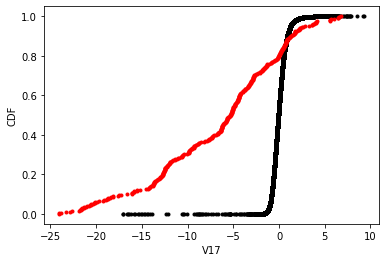

In [23]:
plotImbalancedCDFs(X_tv,y_tv,'V17')

V14 and V17 seeks to be the most useful single features

# Exploration: Bivariate

In [24]:
def scatterTwoFields_Imbalanced(X,y,field0,field1,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    plt.plot(seriesTransform(X[y==0],field0),seriesTransform(X[y==0],field1),'.',color=options['colors'][0])
    plt.plot(seriesTransform(X[y==1],field0),seriesTransform(X[y==1],field1),'.',color=options['colors'][1])
    plt.ylabel(field1)
    plt.xlabel(field0)
    plt.show()

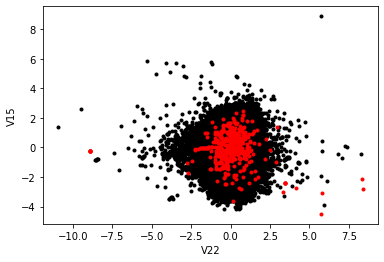

In [25]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'V22','V15')
#V22 and V15 don't distinguish themselves very well and are not very useful

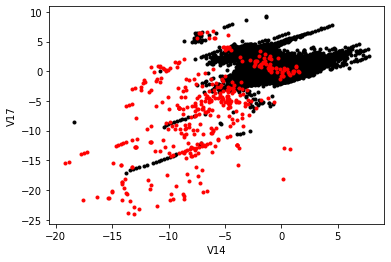

In [26]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'V14','V17')

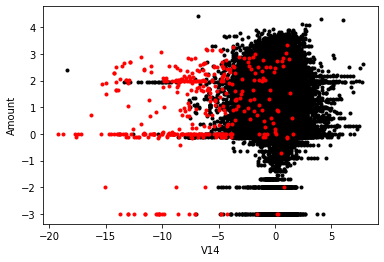

In [27]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'V14','Amount')

In [ ]:
scatterTwoFields_Imbalanced(X_tv,y_tv,'Time','Amount')

In [29]:

# Verifying that the V_n features are PCA output:

df[df.Class<40].corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

# Supervised ML: Single-Feature Sort
Baseline: It seems we might do okay just by looking at individual PCs that have shown strong class separation

e.g. V14

Let's consider just using scaled V14 directly as a confidence value.

AUPRC considers all thresholds, so only the sort ordering matters.

In [30]:
# Min-Max Scaling
preds_m0_V14 = (tv_df.V14-tv_df.V14.max())/(tv_df.V14.min()-tv_df.V14.max())
preds_m0_V14.head()

77847     0.322759
47704     0.291569
109546    0.260655
197986    0.244690
260998    0.300043
Name: V14, dtype: float64

In [31]:
def plotMinMaxScaledVsIndex(X,y,field,flip,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    ps = seriesTransform(X,field)
    (psMin,psMax) = (ps.max(),ps.min()) if flip else (ps.min(),ps.max())
    plt.plot((ps[y==0]-psMin)/(psMax-psMin),'.',color=options['colors'][0])
    plt.plot((ps[y==1]-psMin)/(psMax-psMin),'.',color=options['colors'][1])
    plt.ylabel('Confidence given by %s' % field)
    plt.xlabel('index')
    plt.show()

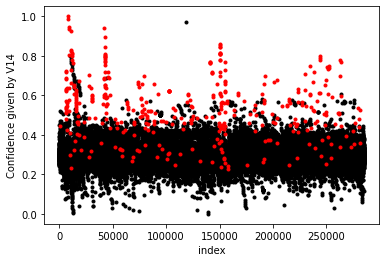

In [32]:
plotMinMaxScaledVsIndex(X_tv,y_tv,'V14',flip=True)

custom sklearn pipeline to perform preprocessing and fit a model.

In [33]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [34]:
class AmountTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,myFloor=0.001):
        self.floor=myFloor
        
    def fit(self,X,y=None):
        return(self)
        
    def transform(self,X,y=None):
        X_ = X.copy()
        if 'Amount' in X.columns:
            X_.Amount = np.log10(X_.Amount.apply(lambda x: max(x,self.floor)))
        return(X_)

In [35]:

# test AmountTransformer() :
pipe0 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005))])
df9 = train_df.head().copy()
df9.at[121392,'Amount'] = 0.00
_ = pipe0.fit(df9)
pipe0.transform(df9)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
171406,120623.0,-0.984629,1.414785,1.142971,0.721923,0.341204,0.300499,0.306724,0.637640,-0.507866,-0.550513,-1.443815,-0.361680,-0.661963,0.511432,0.519812,-0.229372,0.094195,-0.210358,1.038043,0.042764,-0.485255,-1.440586,-0.085621,0.302629,0.350915,-0.845549,0.210625,0.074265,0.000000,0
50930,44708.0,-4.686662,3.284455,-1.260573,0.283085,-3.713478,-0.364052,-2.859323,3.536301,-0.077482,-0.520877,-0.106201,2.016687,0.017443,1.828058,-0.882568,1.098935,0.951901,0.594046,0.159057,-0.570473,0.320571,0.016018,0.271662,0.544310,0.036979,0.212491,-1.176372,-0.306610,1.630631,0
121392,76175.0,-1.173649,0.636961,1.143740,-0.503729,-0.492146,-0.562572,0.795793,0.424550,-0.919000,-0.921945,1.056623,0.794539,-0.051821,0.679481,-0.323120,0.837916,-0.738078,0.069298,-0.314985,0.108486,-0.067052,-0.753516,0.402676,0.292369,-0.421691,-0.101075,-0.118677,0.044447,-2.301030,0
24193,33111.0,-0.490202,0.631620,1.481300,1.094980,0.458802,-0.029032,0.226646,0.239776,-0.802914,0.078970,1.224848,0.068797,-1.048204,0.744883,0.900545,-0.396553,-0.020066,0.410081,0.584804,0.023049,0.279840,0.744216,-0.129144,0.014592,-0.319697,-0.202935,0.168859,0.144563,0.477121,0
43834,41670.0,0.091415,0.496080,1.594352,1.738100,0.028156,0.269313,0.326573,-0.057416,0.160143,0.113772,-0.618425,-0.081564,-0.508855,-0.233107,0.594905,-1.497220,0.807700,-0.449058,1.360342,0.130510,0.026178,0.537444,-0.105691,0.106715,-0.266194,-0.122100,-0.022336,-0.170998,1.173186,0


In [36]:
pipe1 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),('std_normz',StandardScaler())])
_=pipe1.fit(X_tv)

In [37]:
preprocessed_tv = pd.DataFrame(pipe1.transform(X_tv),index=X_tv.index,columns=X_tv.columns)

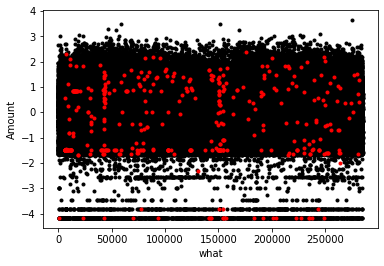

In [38]:
col = 'Amount'
plt.plot(preprocessed_tv[col][y_tv==0],'k.')
plt.plot(preprocessed_tv[col][y_tv==1],'r.')
plt.ylabel(col)
plt.xlabel('what')
plt.show()

Logistic regression model with one feature directly as the confidence value.
V14 provides a decent class separation.
It will be a monotonic function of the single variable.

In [39]:
pipe2 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),
                  ('std_normz',StandardScaler()),
                 ('logisticRegression',LogisticRegression(penalty='none',fit_intercept=True,class_weight='balanced'))])
_=pipe2.fit(X_train[['V14']],y_train)

In [40]:
preds2=pipe2.predict(X_val[['V14']])
decFunc2 = pipe2.decision_function(X_val[['V14']])

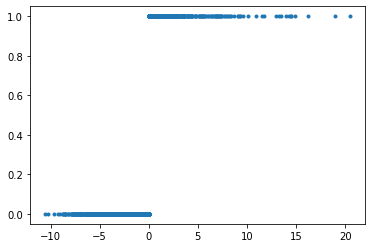

In [41]:
plt.plot(decFunc2,preds2,'.')

In [42]:
print((len(preds2),sum(preds2)))

(45569, 1284)


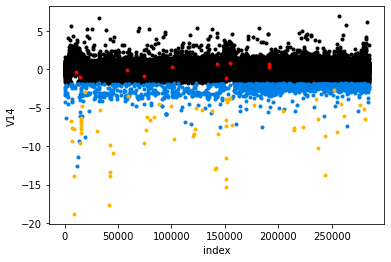

In [43]:
col = 'V14'
plt.plot(X_val[col][(preds2==0) & (y_val==0)],'k.')
plt.plot(X_val[col][(preds2==0) & (y_val==1)],'r.')
plt.plot(X_val[col][(preds2==1) & (y_val==0)],'.',color=[0,0.5,0.9])
plt.plot(X_val[col][(preds2==1) & (y_val==1)],'.',color=[1,0.7,0])
plt.ylabel(col)
plt.xlabel('index')
plt.show()

In [44]:
preds2

array([0, 0, 0, ..., 0, 0, 0])

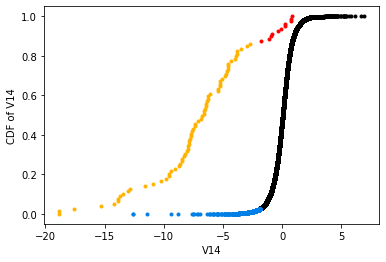

In [45]:
col = 'V14'
cdf_0 = cdf(X_val[col][y_val==0])
cdf_1 = cdf(X_val[col][y_val==1])

threshold_V14_balanced = 0.5*(X_val.V14[preds2==1].max() + X_val.V14[preds2==0].min())
        # not robust to new data: need to flip if predictor increases with class 
plt.plot(cdf_0.x[cdf_0.x>threshold_V14_balanced],cdf_0.CDF[cdf_0.x>threshold_V14_balanced],'k.')
plt.plot(cdf_1.x[cdf_1.x>threshold_V14_balanced],cdf_1.CDF[cdf_1.x>threshold_V14_balanced],'r.')
plt.plot(cdf_0.x[cdf_0.x<=threshold_V14_balanced],cdf_0.CDF[cdf_0.x<=threshold_V14_balanced],'.',color=[0,0.5,0.9])
plt.plot(cdf_1.x[cdf_1.x<=threshold_V14_balanced],cdf_1.CDF[cdf_1.x<=threshold_V14_balanced],'.',color=[1,0.7,0])
plt.ylabel('CDF of V14')
plt.xlabel('V14')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,preds2)

array([[44274,  1216],
       [   11,    68]])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_val,preds2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45490
           1       0.05      0.86      0.10        79

    accuracy                           0.97     45569
   macro avg       0.53      0.92      0.54     45569
weighted avg       1.00      0.97      0.98     45569



In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

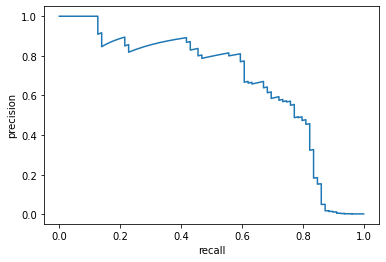

In [49]:
(precis2,recall2,thresh2) = precision_recall_curve(y_val, decFunc2)
plt.plot(recall2,precis2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [50]:
print(auc(recall2,precis2))
print(average_precision_score(y_val,decFunc2))

0.6681924055357462
0.6699344653399216


# Logistic Regression

In [51]:
pipe3 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),
                  ('std_normz',StandardScaler()),
                 ('logisticRegression',LogisticRegression(penalty='none',fit_intercept=True,class_weight='balanced'))])
_=pipe3.fit(X_train,y_train)

In [ ]:

preds3=pipe3.predict(X_val)
decFunc3 = pipe3.decision_function(X_val)

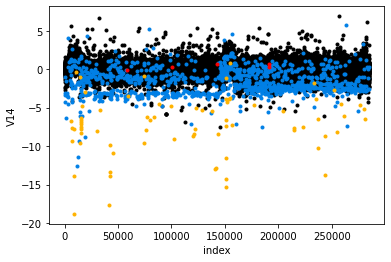

In [53]:
col = 'V14'
plt.plot(X_val[col][(preds3==0) & (y_val==0)],'k.')
plt.plot(X_val[col][(preds3==1) & (y_val==0)],'.',color=[0,0.5,0.9])
plt.plot(X_val[col][(preds3==0) & (y_val==1)],'.',color=[1,0,0])
plt.plot(X_val[col][(preds3==1) & (y_val==1)],'.',color=[1.0,0.7,0.0])
plt.ylabel(col)
plt.xlabel('index')
plt.show()

In [54]:
#Metrics
confusion_matrix(y_val,preds3)

array([[44429,  1061],
       [    5,    74]])

In [55]:
print(classification_report(y_val,preds3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45490
           1       0.07      0.94      0.12        79

    accuracy                           0.98     45569
   macro avg       0.53      0.96      0.56     45569
weighted avg       1.00      0.98      0.99     45569



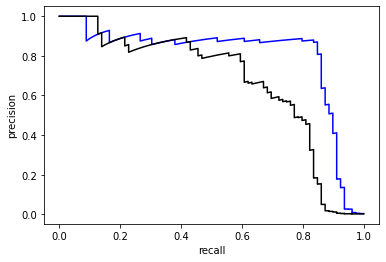

In [56]:
(precis3,recall3,thresh3) = precision_recall_curve(y_val, decFunc3)
plt.plot(recall3,precis3,'b')
plt.plot(recall2,precis2,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [57]:

print(auc(recall3,precis3))
print(average_precision_score(y_val,decFunc3))

0.8002516150277891
0.8018112769445926


We achived good results even without tuning.
Tuning: Some tuning options are irrelevant, since our perf metric doesn't use a threshold.
Our performance metric depends only on our ability to return a SORT that best separates out fraud vs legit
score is weighted evenly across all possible thresholds that could be implemented on that sorted list of confidences

In [58]:
pipe3 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),
                  ('std_normz',StandardScaler()),
                 ('logisticRegression',LogisticRegression(
                         penalty='l2',fit_intercept=True,class_weight='balanced',solver='lbfgs',C=0.01))])
_=pipe3.fit(X_train,y_train)

In [ ]:
preds3=pipe3.predict(X_val)
decFunc3 = pipe3.decision_function(X_val)
(precis3,recall3,thresh3) = precision_recall_curve(y_val, decFunc3)
print(auc(recall3,precis3))


# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
import multiprocessing

In [61]:
multiprocessing.cpu_count()

2

In [62]:
#Random Forest Using default parameters
tic=time.process_time()
pipe4 = Pipeline([('rafo',RandomForestClassifier(n_jobs=-1))])
_=pipe4.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

Processing time (s):
230.165207159


In [ ]:
preds4=pipe4.predict_proba(X_val)

In [ ]:
preds4[:,1]

In [ ]:
print(len(preds4),sum(preds4[:,1]>0))

In [ ]:
for fraudProbability in preds4[:,1]:
    if (fraudProbability>0):
        print(fraudProbability)
# these are all exactly an integer divided by 100.
# Because the confidence values are given by a vote amongst trees

In [ ]:
from collections import Counter
(sorted(list(Counter(preds4[:,1]).items()),key=lambda x: x[0]))

Predictions are discretized to integers/100 because they are a vote amongst 100 trees

In [ ]:
plt.plot(preds4[:,1],'.')

In [ ]:
preds4

In [ ]:
(precis4,recall4,thresh4) = precision_recall_curve(y_val,preds4[:,1])

In [ ]:
thresh4

In [ ]:
(precis4,recall4,thresh4) = precision_recall_curve(y_val,preds4[:,1])
plt.plot(recall4,precis4,'b')
plt.plot(recall3,precis3,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
print(auc(recall4,precis4))

# More trees¶

In [ ]:
tic=time.process_time()
pipe5 = Pipeline([('rafo',RandomForestClassifier(n_estimators=1000,n_jobs=-1))])
_=pipe5.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

In [ ]:
preds5=pipe5.predict_proba(X_val)

In [ ]:
preds5[:,1]

In [ ]:
from collections import Counter
(sorted(list(Counter(preds5[:,1]).items()),key=lambda x: x[0]))

In [ ]:

(precis5,recall5,thresh5) = precision_recall_curve(y_val,preds5[:,1])
plt.plot(recall5,precis5,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
print(auc(recall5,precis5))

# class_weight = 'balanced'

In [ ]:
tic=time.process_time()
pipe42 = Pipeline([('rafo',RandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight='balanced'))])
_=pipe42.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

In [ ]:
preds42=pipe42.predict_proba(X_val)
(sorted(list(Counter(preds42[:,1]).items()),key=lambda x: x[0]))

In [ ]:
sum(preds42[:,1]>0.5)

In [ ]:
(precis42,recall42,thresh42) = precision_recall_curve(y_val,preds42[:,1])
plt.plot(recall42,precis42,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
print(auc(recall42,precis42))

# class_weight = 'balanced_subsample'

In [ ]:
tic=time.process_time()
pipe43 = Pipeline([('rafo',RandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight='balanced_subsample'))])
_=pipe43.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

In [ ]:
preds43=pipe43.predict_proba(X_val)
(sorted(list(Counter(preds43[:,1]).items()),key=lambda x: x[0]))

In [ ]:
(precis43,recall43,thresh43) = precision_recall_curve(y_val,preds43[:,1])
plt.plot(recall43,precis43,'b')
plt.plot(recall4,precis4,'k')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
print(auc(recall43,precis43))

# imblearn library: BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
tic=time.process_time()
pipe60 = Pipeline([('brafo',BalancedRandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight=None))])
_=pipe60.fit(X_train,y_train)
print('Processing time (s):')
print(time.process_time()-tic)

In [ ]:
# Build a trivial logistic regression model, using only one feature directly as the confidence value.
# Try V14, which seemed to provide decent class separation.
# It will be a monotonic function of the single variable.

In [ ]:
pipe2 = Pipeline([('amt_tx',AmountTransformer(myFloor=0.005)),
                  ('std_normz',StandardScaler()),
                 ('logisticRegression',LogisticRegression(penalty='none',fit_intercept=True,class_weight='balanced'))])
_=pipe2.fit(X_train[['V14']],y_train)

# Random Forests + SMOTE Augmentation
Synthetic Minority Over-sampling Technique (SMOTE) was introduced by Nitesh V. Chawla et. to the. in 2002. SMOTE is an over-sampling technique focused on generating synthetic tabular data. The general idea of SMOTE is the generation of synthetic data between each sample of the minority class and its “k” nearest neighbors. That is, for each one of the samples of the minority class, its “k” nearest neighbors are located (by default k = 5), then between the pairs of points generated by the sample and each of its neighbors, a new synthetic data is generated. In Figure 2 you can see a visual description of the SMOTE implementation.
Source:
https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
oversample = SMOTE()
(X_train_smote0,y_train_smote0) = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape,sum(y_train))
print(X_train_smote0.shape,sum(y_train_smote0))

In [ ]:
scatterTwoFields_Imbalanced(X_train,y_train,'V14','V17')

In [97]:
scatterTwoFields_Imbalanced(X_train_smote,y_train_smote,'V14','V17')

NameError: ignored